In [1]:
#import all required strings

from LiarLiarPreProcessor import LiarLiarPreProcessor
import numpy as np

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/angelayoon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/angelayoon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# LiarLiarPreProcessor Demo Script
The following script demos the capabilities of the Liar Liar pre-processor that we used to encode the data. This is a wrapper of the PreProcessor class designed specifically for the LiarLiar Dataset

## Initializing the LiarLiarPreProcessor

### Create an instance of the LiarLiarPreProcessor class and import the dataset from a file

The preprocessor imports files based on the file name. The file must be located in the "datasets" folder. We automatically replace Null and NaN dataset entries with "N/A"

When loading a dataset, the preProcessor automatically looks for a .tsv file named "train.tsv" in the "datasets" folder (must be in this folder) with the following column headers
1. 'id': the ID of the statement ([ID].json).
2. 'label': the label.
3. 'statement': the statement.
4. 'subjects': the subject(s).
5. 'speaker': the speaker.
6. 'speaker_job_title': the speaker's job title.
7. 'state_info': the state info.
8. 'party_affiliation': the party affiliation.

Column 9-13: the total credit history count, including the current statement.

9. 'count_1', pants on fire counts.
10. 'count_2',false counts.
11. 'count_3',barely true counts.
12. 'count_4',half true counts.
13. 'count_5',mostly on fire counts.

14. 'context': the context (venue / location of the speech or statement).

Asside from this, there are the following options:
* replace_Null_Nan: This option automatically replaces an Null or NaN values with 'N/A' in the dataset

In [3]:
liar_liar_pre_processor = LiarLiarPreProcessor(verbose=False)

#load the training data
liar_liar_pre_processor.import_training_data(
    file_name="train.tsv",
    deliminator='\t',
    custom_headers=None,
    replace_Null_NaN=True
)

### Denoting which column in the dataset corresponds to the labels for each data sample

We provide a custom encoding (optional) so that each possible label can be encoded using a unique number. For additional flexibility, the labels (or any set of data for that matter) can be encoded based on the following options:
- Standard mapping: Labels are encoded either through the provided encoding_mapping or automatically using a unique integer for each label
- normalized mapping: When it makes sense, labels can be normalized so as to range from 0 to 1
- binarized mapping: Finally, labels can be binarized to be either 0 or 1. This generally only makes sense with only two labels or if data is specifically constructed to be binarized (ex: mostly true vs mostly false)


By default, the labels for each data sample will come from the column titled: 'label' with the encoding as follows (although this can be changed):

{'pants-fire':0,
'false':1,
'barely-true':2,
'half-true':3,
'mostly-true':4,
'true':5}

In [4]:
#set the label column
liar_liar_pre_processor.set_label_header(
    label_header='label',
    custom_label_encoding=False,
    normalize=False,
    binarize=True
)

## Configuring and Obtaining a Dataset

### Configuring a Dataset
A data set is configured by supplying the preprocessor with a list of encoder configuration dictionaries

### Types of encoders:

There are three types of encoders:
1. Standard encoder: this is the same encoder that is used to encode the labels, and it includes the same parameters (custom mapping, binarization, normalization)
2. Bag-of-words: This encoder performs a bag-of-words encoding. It includes options to clean strings (clean up punctuation, ect), remove stop words (remove common words), and lematize (reduce words down to their simplest forms).
3. Credit score encoder: This encoder computes a weighted average and uses the weighted average of the given columns as the encoding (ex: for a credit history score).

### Applying Filters:

 The Standard Encoder and Bag-of-words encoders also support filtering for specific features. If desired, specify a list of exact features to only use those specific features when encoding the data

In [5]:
encoder_parameters = [
    {"encoder_name": "statement",
        "encoder_type":"bag-of-words",
        "feature_name":"statement",
        "clean_strings":True,
        "remove_stop_words":True,
        "lematize":True,
        "filtering" : {
            "filtering_enabled":False,
            "filtered_terms": []
        }
    },
    {"encoder_name": "subjects",
        "encoder_type":"bag-of-words",
        "feature_name":"subjects",
        "clean_strings":True,
        "remove_stop_words":True,
        "lematize":True,
        "filtering" : {
            "filtering_enabled":False,
            "filtered_terms": []
        }
    },
    {"encoder_name": "context",
        "encoder_type":"bag-of-words",
        "feature_name":"context",
        "clean_strings":True,
        "remove_stop_words":True,
        "lematize":True,
        "filtering" : {
            "filtering_enabled":False,
            "filtered_terms": []
        }
    },
    {"encoder_name": "party affiliation",
        "encoder_type":"encode",
        "feature_name":"party_affiliation",
        "encoding_mapping":None,
        "normalize":False,
        "Binarize":False,
        "filtering" : {
            "filtering_enabled":True,
            "filtered_terms": ['republican', 'democrat', 'none']
        }
    },
    {"encoder_name": "speaker",
        "encoder_type":"encode",
        "feature_name":"speaker",
        "encoding_mapping":None,
        "normalize":False,
        "Binarize":False,
        "filtering" : {
            "filtering_enabled":False,
            "filtered_terms": []
        }
    },
    {"encoder_name": "speaker_job_title",
        "encoder_type":"encode",
        "feature_name":"speaker_job_title",
        "encoding_mapping":None,
        "normalize":False,
        "Binarize":False,
        "filtering" : {
            "filtering_enabled":False,
            "filtered_terms": []
        }
    },
    {"encoder_name": "state_info",
        "encoder_type":"encode",
        "feature_name":"state_info",
        "encoding_mapping":None,
        "normalize":False,
        "Binarize":False,
        "filtering" : {
            "filtering_enabled":False,
            "filtered_terms": []
        }
    },
    {"encoder_name": "credit score",
        "encoder_type":"credit history",
        "feature_names":['count_1','count_2','count_3','count_4','count_5'],
        "compute_credit_history":True
    }
]

#load the encoding configurations for the desired dataset

liar_liar_pre_processor.configure_encodings(encoder_parameters=encoder_parameters)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/angelayoon/Documents/Duke/2023_Spring/STA 561/Encoder.py:330: RuntimeWarning: invalid value encountered in true_divide
  weighted_credit_counts = credit_counts / sums[:,None]


## Generate a dataset



In [6]:
y,X,X_headers = liar_liar_pre_processor.get_dataset()

In [7]:
#apply to the test set
y_test,X_test = liar_liar_pre_processor.apply_encodings_to_new_data('test.tsv')

## K-Nearest Neighbor Model



In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, np.ravel(y,order='C'))

KNeighborsClassifier(n_neighbors=10)

In [12]:
print(knn.score(X_test, y_test))

0.5868878357030016


In [ ]:
neighbors = np.arange(1, 20)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, np.ravel(y,order='C'))
      
    # Compute traning and test data accuracy
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot

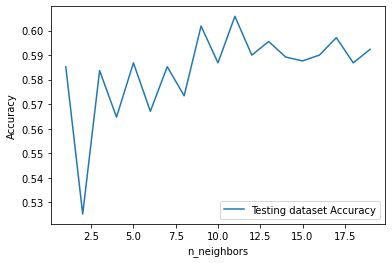

In [18]:
import matplotlib.pyplot as plt

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.savefig("KNN.png")
plt.show()